# Introduction to Pandas

## Introduction
* Pandas is a newer package built on top of NumPy
* Pandas provides an efficient implementation of a DataFrame
* DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data.
* Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs
* documentation: http://pandas.pydata.org/pandas-docs/stable/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("default")


In [11]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/lecture_related/solutions/day1/ex01/data')  # Add the parent directory to the path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
os.makedirs('data', exist_ok=True)  # Create the 'data' directory if it doesn't exist

data = pd.DataFrame(np.random.randn(50, 5))

data.to_csv('data/test_csv.csv', sep=';', index_label=['a', 'b', 'c', 'd', 'e', 'f'], decimal=',')
data.to_excel('data/test_excel.xlsx')

## Read csv-data

http://pandas.pydata.org/pandas-docs/stable/io.html#

In [28]:
data_csv = pd.read_csv('data/test_csv.csv')
data_csv.head()

,,,,,a;b;c;d;e;f;0;1;2;3;4
0;-0,6822394046500934;-0,16089885061749856;-0,7824834292137356;-1,1916508210784318;-1,4909832707189223
1;-0,25473390118787426;1,1031417933417829;0,550404126665414;-0,26516092360232457;0,99029568796641
2;1,2010792968710324;0,5450649728665435;-2,1633994746460115;0,8001813167254891;0,21804924989682527
3;1,0798045668357998;0,00275970500733267;-0,681147374791242;-2,15985991762784;-0,3869277231620384
4;-0,12780464686251963;2,1472726405217015;-1,4397559776880755;-1,5447891389579531;-1,1860864753399822


In [29]:
# sometimes you have to give some more details to read the csv correctly

data_csv = pd.read_csv('data/test_csv.csv', sep=';', decimal=',', usecols=(0, 1, 2, 3, 4))
data_csv.head()

,a,b,c,d,e
0,0,-0.682239,-0.160899,-0.782483,-1.191651
1,1,-0.254734,1.103142,0.550404,-0.265161
2,2,1.201079,0.545065,-2.163399,0.800181
3,3,1.079805,0.002760,-0.681147,-2.159860
4,4,-0.127805,2.147273,-1.439756,-1.544789


## Basic Operations on Data Frames

In [30]:
# shape of the data frame

data_csv.shape

(50, 5)

In [31]:
# filter rows of the data frame

data_csv = data_csv.query('a < 0.8 | c > 0')
data_csv.head()

,a,b,c,d,e
0,0,-0.682239,-0.160899,-0.782483,-1.191651
1,1,-0.254734,1.103142,0.550404,-0.265161
2,2,1.201079,0.545065,-2.163399,0.800181
3,3,1.079805,0.002760,-0.681147,-2.159860
4,4,-0.127805,2.147273,-1.439756,-1.544789


In [32]:
# filter columns of the data frame

data_csv = data_csv.filter(items=['a', 'b', 'c'])
print(data_csv.shape)
data_csv.head()

(29, 3)


,a,b,c
0,0,-0.682239,-0.160899
1,1,-0.254734,1.103142
2,2,1.201079,0.545065
3,3,1.079805,0.002760
4,4,-0.127805,2.147273


In [33]:
# sort the data frame

data_csv = data_csv.sort_values(by=['c'])
data_csv.head()

,a,b,c
0,0,-0.682239,-0.160899
3,3,1.079805,0.002760
49,49,0.981529,0.058845
41,41,-2.020272,0.169749
44,44,-0.148269,0.293857


In [34]:
# set index
data_csv = data_csv.set_index(keys=['b']) # Assuming 'b' is a column you want as index
data_csv = data_csv.sort_values(by=['b']) # Sort by the new index 'b'
data_csv.head()

,a,c
b,,
-2.020272,41,0.169749
-1.395355,33,2.079360
-1.262919,32,0.600694
-0.830051,26,0.308178
-0.682239,0,-0.160899


### Indexing

In [36]:
# save a new csv

data_csv.to_csv('data/test_neue_csv.csv', sep=';', decimal=',')

## Statistical Operations

In [37]:
data_csv.sum()

,0
a,640.000000
c,22.852901


In [38]:
data_csv.mean()

,0
a,22.068966
c,0.788031


In [39]:
data_csv.median()

,0
a,22.000000
c,0.665714


In [40]:
data_csv.std()

,0
a,14.937802
c,0.597211


In [42]:
data_csv['a'].describe()

,a
count,29.000000
mean,22.068966
std,14.937802
min,0.000000
25%,9.000000
50%,22.000000
75%,33.000000
max,49.000000


## Plotting functions

<Axes: xlabel='b'>

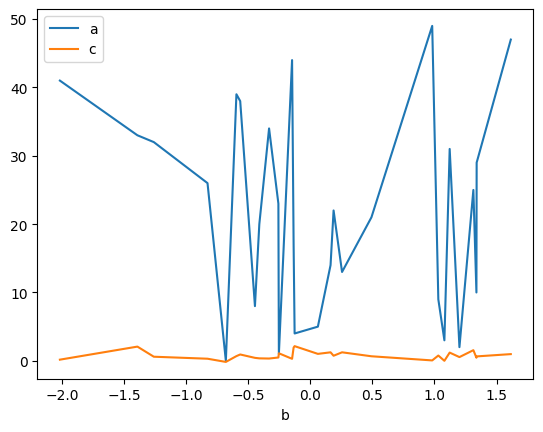

In [43]:
data_csv.plot()

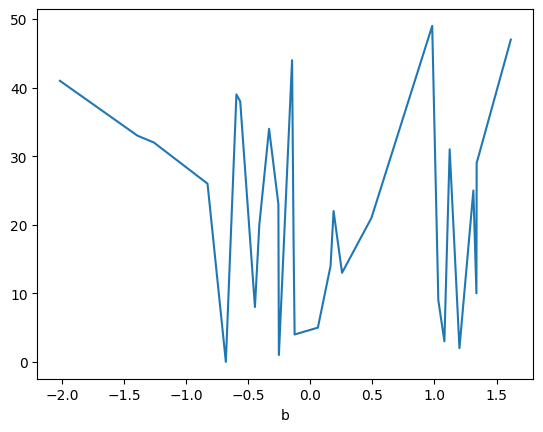

In [45]:
plt.figure()
data_csv['a'].plot()
plt.show()

## Read excel-data

In [46]:
data_excel = pd.read_excel('data/test_excel.xlsx')
data_excel.head()

,Unnamed: 0,0,1,2,3,4
0,0,-0.682239,-0.160899,-0.782483,-1.191651,-1.490983
1,1,-0.254734,1.103142,0.550404,-0.265161,0.990296
2,2,1.201079,0.545065,-2.163399,0.800181,0.021805
3,3,1.079805,0.002760,-0.681147,-2.159860,-0.386928
4,4,-0.127805,2.147273,-1.439756,-1.544789,-1.186086
